In [1]:
import numpy as np
import matplotlib.pyplot as mtp  
import pandas as pd 

In [4]:
data_set= pd.read_csv(r'C:\Users\Vinod\Desktop\major project\stocks\tesla_stocks.csv')  
data_set.dropna(axis='columns')
data_set.fillna(0, inplace=True)
data_set

,Unnamed: 0,Unnamed: 0.1,Date,Open,High,Low,Close,Volume,Trend,Close_10,Future Trend,Total score
0,0,0,20141231,44.618000,45.136002,44.450001,44.481998,11487500,-1,38.374001,-1,45
1,1,1,20150102,44.574001,44.650002,42.652000,43.862000,23822000,-1,38.613998,-1,147
2,2,2,20150105,42.910000,43.299999,41.431999,42.018002,26842500,-1,38.386002,-1,42
3,3,3,20150106,42.012001,42.840000,40.841999,42.256001,31309500,1,39.313999,-1,52
4,4,4,20150107,42.669998,42.956001,41.956001,42.189999,14842000,-1,40.324001,-1,216
...,...,...,...,...,...,...,...,...,...,...,...,...
1158,1158,1158,20190808,46.889999,47.959999,46.529999,47.660000,26371500,1,42.240000,-1,155
1159,1159,1159,20190809,47.209999,47.792000,46.762001,47.001999,19491000,-1,43.000000,-1,190
1160,1160,1160,20190812,46.598000,47.153999,45.750000,45.801998,23319500,-1,42.820000,-1,11
1161,1161,1161,20190813,45.762001,47.200001,45.509998,47.000000,24240500,1,43.120000,-1,219


In [5]:
feature_df = data_set[['Trend','Total score']]


x = np.asarray(feature_df)

y = np.asarray(data_set['Future Trend'])


No handles with labels found to put in legend.


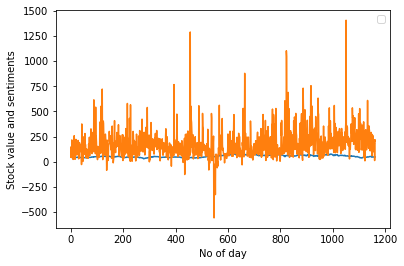

In [6]:
mtp.plot(data_set['Unnamed: 0'],data_set['Open'],data_set['Total score'])
mtp.xlabel("No of day")
mtp.ylabel("Stock value and sentiments")
mtp.legend()

In [7]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

In [8]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 20, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  
y_pred

array([ 1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1,
       -1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
        1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1,
       -1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1,
       -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,
       -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,
        1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,
       -1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1,
        1, -1,  1, -1, -1

In [11]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[55, 63],
       [49, 66]], dtype=int64)

In [12]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.51931330472103
